In [1]:
import numpy as np
import os, sys
import re
import cv2
from PIL import Image
from matplotlib import pyplot as plt

from model import Deeplabv3
%matplotlib inline

In [2]:
def sortOrder(name):
    return int(re.findall("\d+", name)[0])

image loading terminated (240, 320, 3)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
model loaded
End image 0
End image 100
End image 200
End image 300
End image 400
End image 500
End image 600
End image 700
End image 800
End image 900
End image 1000
End image 1100
End image 1200
End image 1300
End image 1400
End image 1500
End image 1600
End image 1700
End image 1800
End image 1900
End image 2000
End image 2100
End image 2200
End image 2300
End image 2400
End image 2500
End image 2600
End image 2700
End image 2800
End image 2900
End image 3000
End image 3100


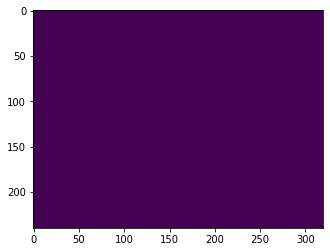

In [3]:
# Generates labels using most basic setup.  Supports various image sizes.  Returns image labels in same format
# as original image.  Normalization matches MobileNetV2

trained_image_width=512 
mean_subtraction_value=127.5

img_src_rgb = os.listdir('imgs/RGB_final')
img_src_rgb.sort(key = sortOrder)
images = []
for rgb in img_src_rgb:
    image = np.array(Image.open('imgs/RGB_final/'+rgb))
    images.append(image)
    
images = np.array(images)
print("image loading terminated", image.shape)
# resize to max dimension of images from training dataset
w, h, _ = images[0].shape
ratio = float(trained_image_width) / np.max([w, h])

labels_tot = []
deeplab_model = Deeplabv3(backbone='xception')
print("model loaded")
for i in range(0, images.shape[0]):
    resized_image = np.array(Image.fromarray(images[i].astype('uint8')).resize((int(ratio * h), int(ratio * w))))

    # apply normalization for trained dataset images
    resized_image = (resized_image / mean_subtraction_value) - 1.

    # pad array to square image to match training images
    pad_x = int(trained_image_width - resized_image.shape[0])
    pad_y = int(trained_image_width - resized_image.shape[1])
    resized_image = np.pad(resized_image, ((0, pad_x), (0, pad_y), (0, 0)), mode='constant')

    # make prediction

    res = deeplab_model.predict(np.expand_dims(resized_image, 0))

    labels = np.argmax(res.squeeze(), -1)

    # remove padding and resize back to original image
    if pad_x > 0:
        labels = labels[:-pad_x]
    if pad_y > 0:
        labels = labels[:, :-pad_y]
    labels = np.array(Image.fromarray(labels.astype('uint8')).resize((h, w)))
    
    #labels[labels!=15] = 0
    #labels[labels==15] = 255
    
    labels_tot.append(labels)
    if (i % 100) == 0:
        print("End image " + str(i))

labels_tot = np.array(labels_tot)
plt.imshow(labels_tot[0])

In [4]:
len(labels_tot)
#labels_tot = np.array(labels_tot)
#labels_tot.shape

3124

In [ ]:
#labels[labels!=15] = 0
#labels[labels==15] = 255

C:\Users\lucaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


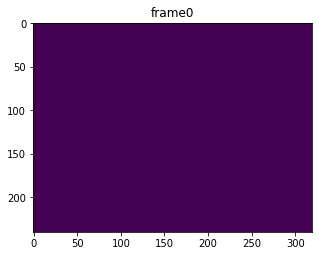

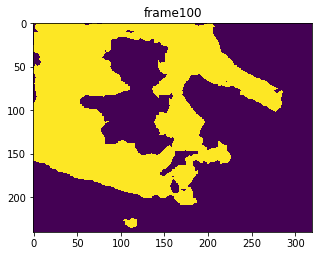

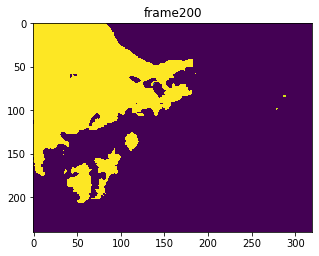

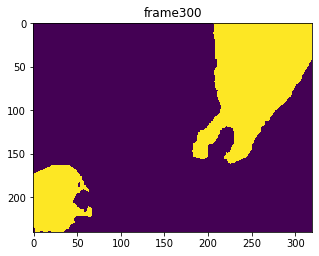

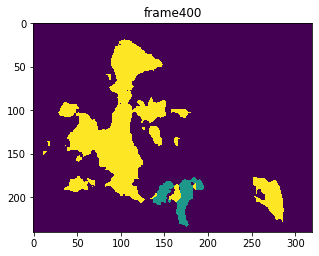

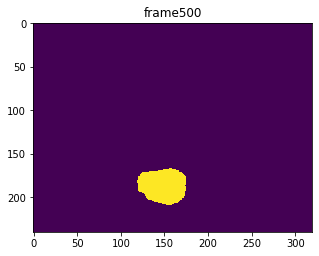

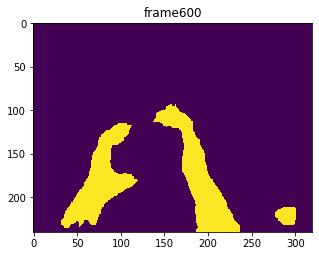

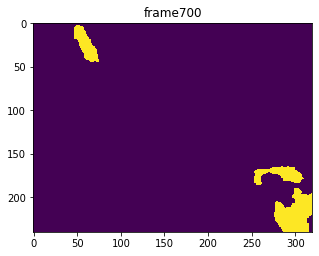

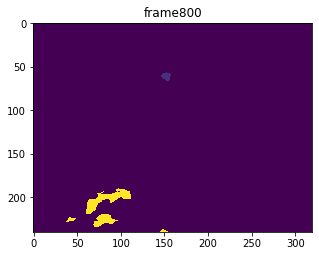

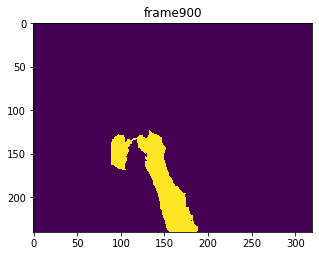

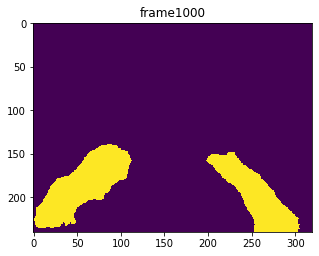

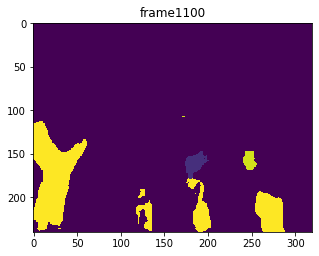

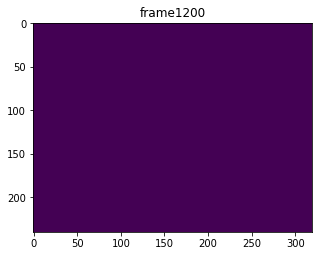

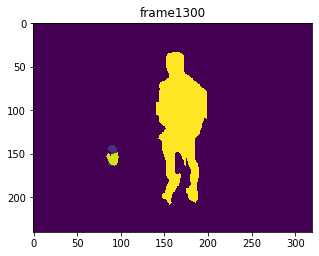

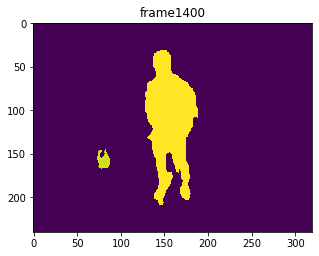

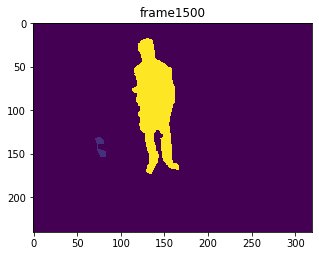

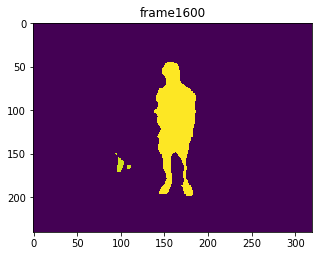

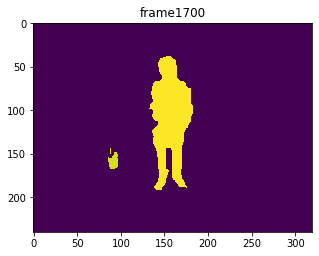

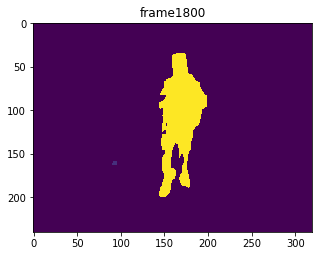

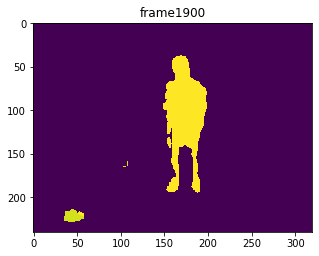

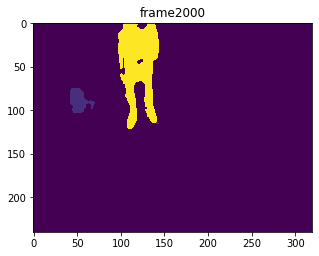

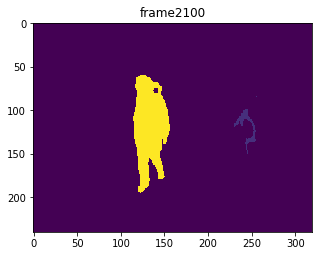

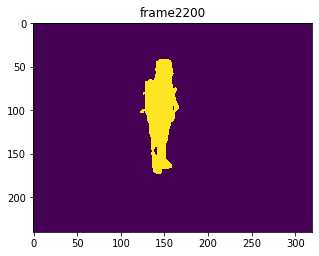

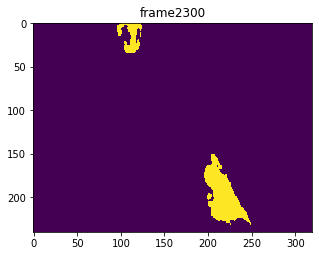

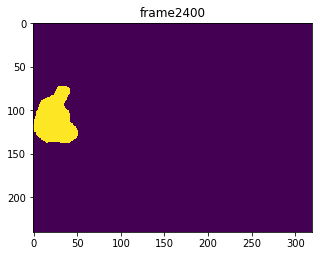

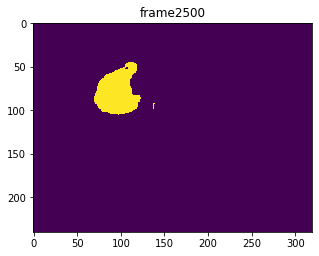

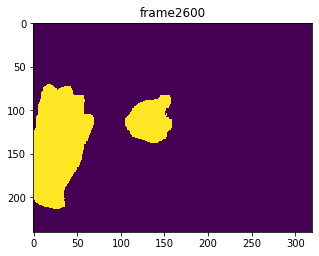

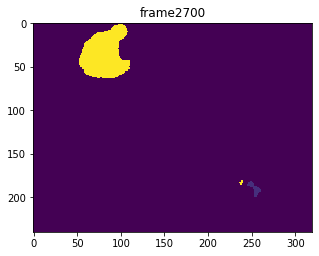

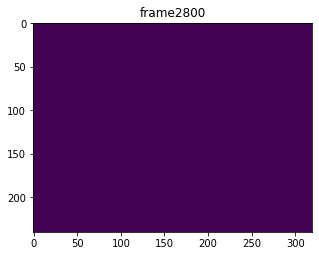

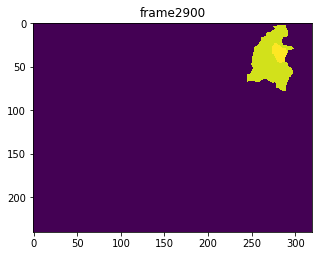

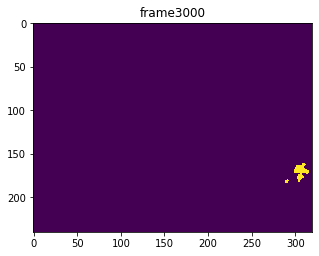

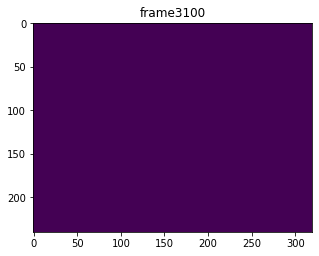

In [5]:
for i in range(0, labels_tot.shape[0], 100):
    plt.figure(figsize=(5, 5))
    plt.title("frame" + str(i))
    plt.imshow(labels_tot[i])

In [ ]:
for i in range(1190, 1290, 2):
    plt.figure(figsize=(5, 5))
    plt.title("frame" + str(i))
    plt.imshow(images[i])

In [ ]:
labels.shape

In [ ]:
labels_tot[2350][25][100]

In [ ]:
plt.imshow(labels_tot[850])

In [ ]:
for i in range(0, 5000):
    cv2.imwrite('imgs/results/frame'+str(i)+'.jpg', labels_tot[i])

In [6]:
labels_tot_copy = labels_tot.copy()

In [7]:
labels_tot_copy.shape

(3124, 240, 320)

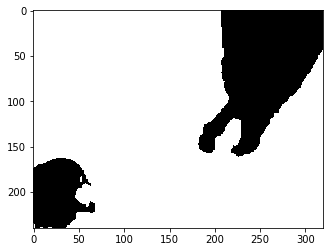

In [8]:
labels_tot_copy[labels_tot_copy!=15] = 255
labels_tot_copy[labels_tot_copy==15] = 0
plt.imshow(labels_tot_copy[300], cmap='gray')

In [9]:
for i in range(0, labels_tot_copy.shape[0]):
    cv2.imwrite('imgs/RGB_mask/frame'+str(i)+'.jpg', labels_tot_copy[i])